/ncrc/home1/Qian.Xiao/.conda/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


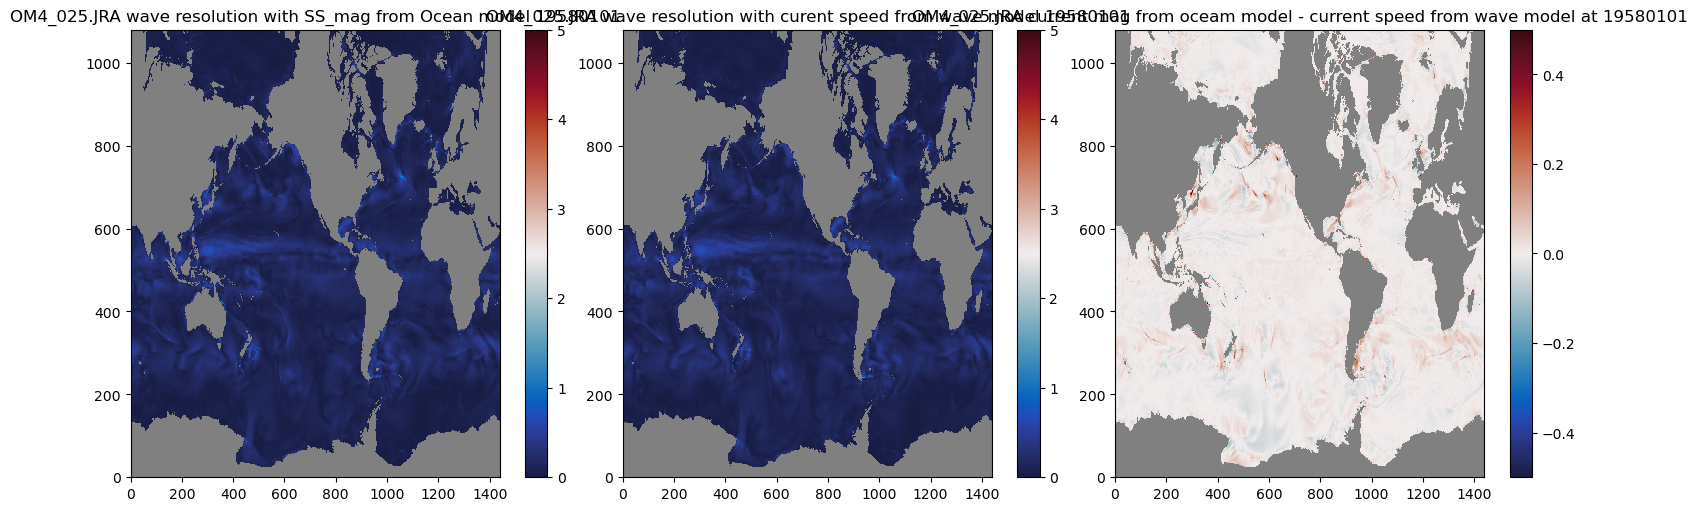

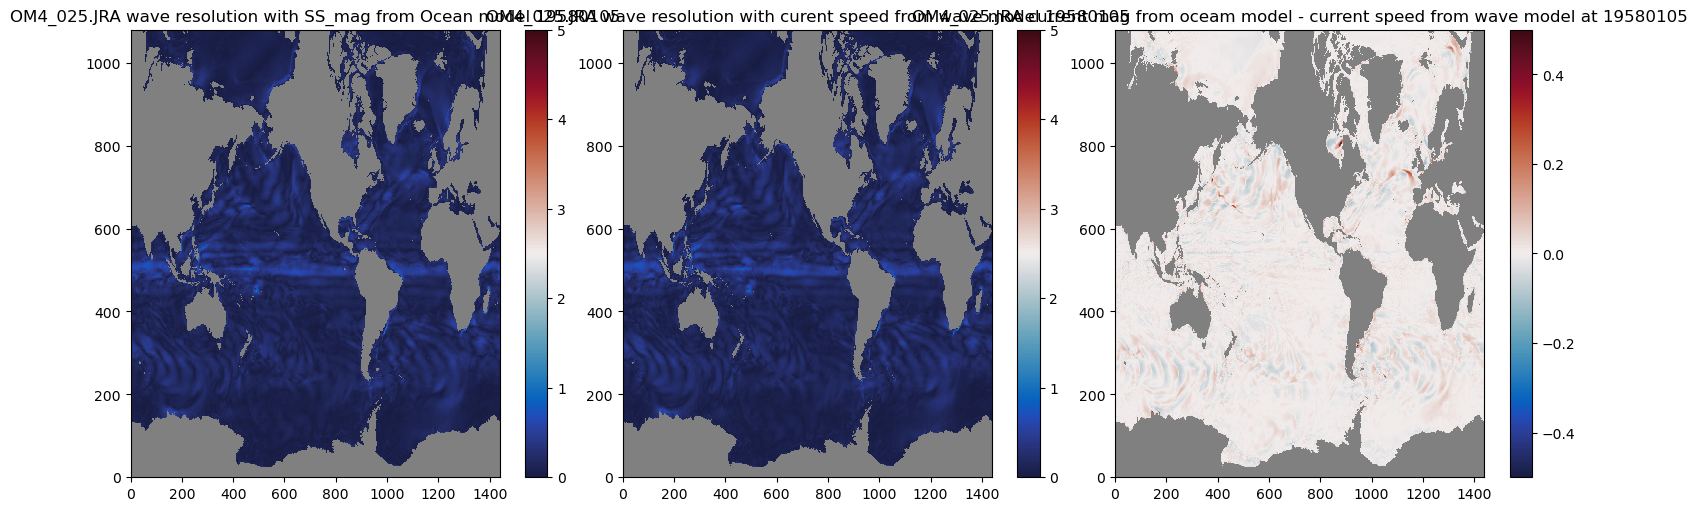

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray
import numpy as np
import logging
from netCDF4 import Dataset
import cmocean
import copy

pp_rootOM4="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/OM4_025_tryow.JRA/"
wave_rootOM4=pp_rootOM4+"/WW3/PostProc/ww3.1958.nc"
# wave_rootOM4="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/experimentF/NWA12.COBALT_wavebeta155/WW3/PostProc/ww3.199301.nc"
ocean_daily_snapOM4= xarray.open_dataset(pp_rootOM4+"19580101.ocean_daily_snap.nc")
# ocean_dailyOM4= xarray.open_dataset(pp_rootOM4+"19580101.ocean_daily.nc")
ww3OM4= Dataset(wave_rootOM4)
ssuOM4_o=ocean_daily_snapOM4.variables['ssu_snap']
ssvOM4_o=ocean_daily_snapOM4.variables['ssv_snap']
speedOM4_o=ocean_daily_snapOM4.variables['speed_snap']
t_ocean = ocean_daily_snapOM4.variables['time'][:] ###from the second day

ssuOM4 = xarray.DataArray(ssuOM4_o, dims=["time","yh", "xh"])
ssvOM4 = xarray.DataArray(ssvOM4_o, dims=["time","yh", "xh"])
speedOM4 = xarray.DataArray(speedOM4_o, dims=["time","yh", "xh"])
ssuOM4=ssuOM4[:,:,1:]
ssvOM4=ssvOM4[:,1:,:]
SS_magOM4=np.sqrt(ssuOM4**2 + ssvOM4**2)
model_grid_x = ocean_daily_snapOM4.variables['xh']
model_grid_y = ocean_daily_snapOM4.variables['yh']


ucurOM4=ww3OM4.variables['ucur'][:]
vcurOM4=ww3OM4.variables['vcur'][:]
tOM4 = ww3OM4.variables['time'][:] ###from the first days as this counted from 1990-01-01 days on
curOM4=np.sqrt(ucurOM4**2 + vcurOM4**2)    
model_grid_x_waveOM4=ww3OM4.variables['longitude'][0,:]
model_grid_y_waveOM4=ww3OM4.variables['latitude'][:,0]
da_curOM4 = xarray.DataArray(
    curOM4,
    dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
    coords={'time': tOM4, 'xh': model_grid_x_waveOM4, 'yh': model_grid_y_waveOM4},  # Define coordinates
    name='cur'  # Optional: Give the variable a name
)   

da_magOM4 = xarray.DataArray(
    SS_magOM4,
    dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
    coords={'time': t_ocean, 'xh': model_grid_x_waveOM4, 'yh': model_grid_y_waveOM4},  # Define coordinates
    name='cur'  # Optional: Give the variable a name
)   

cmocean.cm.balance
cmap = copy.copy(cmocean.cm.balance)
cmap.set_bad('gray')

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


# Plot the first dataset
mesh1 = axes[0].pcolormesh(da_magOM4[0,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[0].set_title('OM4_025.JRA wave resolution with SS_mag from Ocean model 19580101')
plt.colorbar(mesh1, ax=axes[0])  # Add colorbar for the first plot

# Plot the second dataset
mesh2 = axes[1].pcolormesh(da_curOM4[1,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[1].set_title('OM4_025.JRA wave resolution with curent speed from wave model 19580101')
plt.colorbar(mesh2, ax=axes[1])  # Add colorbar for the second plot

# Plot the third dataset
diff_ocean_wave_1=da_magOM4[0,:,:]- da_curOM4[1,:,:]
mesh3 = axes[2].pcolormesh(diff_ocean_wave_1, cmap=cmap, shading='auto', vmin=-0.5, vmax=0.5)
axes[2].set_title('OM4_025.JRA current mag from oceam model - current speed from wave model at 19580101')
plt.colorbar(mesh3, ax=axes[2])  # Add colorbar for the third plot

# Show the plot
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


# Plot the first dataset
mesh1 = axes[0].pcolormesh(da_magOM4[4,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[0].set_title('OM4_025.JRA wave resolution with SS_mag from Ocean model 19580105')
plt.colorbar(mesh1, ax=axes[0])  # Add colorbar for the first plot

# Plot the second dataset
mesh2 = axes[1].pcolormesh(da_curOM4[5,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[1].set_title('OM4_025.JRA wave resolution with curent speed from wave model 19580105')
plt.colorbar(mesh2, ax=axes[1])  # Add colorbar for the second plot

# Plot the third dataset
diff_ocean_wave_1=da_magOM4[4,:,:]- da_curOM4[5,:,:]
mesh3 = axes[2].pcolormesh(diff_ocean_wave_1, cmap=cmap, shading='auto', vmin=-0.5, vmax=0.5)
axes[2].set_title('OM4_025.JRA current mag from oceam model - current speed from wave model at 19580105')
plt.colorbar(mesh3, ax=axes[2])  # Add colorbar for the third plot

# Show the plot
plt.show()

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray
import numpy as np
import logging
from netCDF4 import Dataset


pp_root_12="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/NWA12.COBALT_all_wave1_12/"
wave_root_12=pp_root_12+"/WW3/PostProc/ww3.199301.nc"
# wave_root_12="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/experimentF/NWA12.COBALT_wavebeta155/WW3/PostProc/ww3.199301.nc"
ocean_daily_snap_12= xarray.open_dataset(pp_root_12+"19930101.ocean_daily_snap.nc")
ocean_daily_12= xarray.open_dataset(pp_root_12+"19930101.ocean_daily.nc")
ww3_12= Dataset(wave_root_12)
ssu_12_o=ocean_daily_snap_12.variables['ssu_snap']
ssv_12_o=ocean_daily_snap_12.variables['ssv_snap']
speed_12_o=ocean_daily_snap_12.variables['speed_snap']
t_ocean = ocean_daily_snap_12.variables['time'][:] ###from the second day

ssu_12 = xarray.DataArray(ssu_12_o, dims=["time","yh", "xh"])
ssv_12 = xarray.DataArray(ssv_12_o, dims=["time","yh", "xh"])
speed_12 = xarray.DataArray(speed_12_o, dims=["time","yh", "xh"])
ssu_12=ssu_12[:,:,1:]
ssv_12=ssv_12[:,1:,:]
SS_mag_12=np.sqrt(ssu_12**2 + ssv_12**2)
model_grid_x = ocean_daily_snap_12.variables['xh']
model_grid_y = ocean_daily_snap_12.variables['yh']


ucur_12=ww3_12.variables['ucur'][:]
vcur_12=ww3_12.variables['vcur'][:]
t_12 = ww3_12.variables['time'][:] ###from the first days as this counted from 1990-01-01 days on
cur_12=np.sqrt(ucur_12**2 + vcur_12**2)    
model_grid_x_wave_12=ww3_12.variables['longitude'][0,:]
model_grid_y_wave_12=ww3_12.variables['latitude'][:,0]
da_cur_12 = xarray.DataArray(
    cur_12,
    dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
    coords={'time': t_12, 'xh': model_grid_x_wave_12, 'yh': model_grid_y_wave_12},  # Define coordinates
    name='cur'  # Optional: Give the variable a name
)   

da_mag_12 = xarray.DataArray(
    SS_mag_12,
    dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
    coords={'time': t_ocean, 'xh': model_grid_x_wave_12, 'yh': model_grid_y_wave_12},  # Define coordinates
    name='cur'  # Optional: Give the variable a name
)   




/ncrc/home1/Qian.Xiao/.conda/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


In [8]:
model_grid_x_wave_12

masked_array(data=[-98.      , -97.92001 , -97.84    , -97.76001 ,
                   -97.67999 , -97.600006, -97.51999 , -97.44    ,
                   -97.359985, -97.28    , -97.20001 , -97.119995,
                   -97.04001 , -96.95999 , -96.880005, -96.79999 ,
                   -96.72    , -96.640015, -96.56    , -96.48001 ,
                   -96.399994, -96.32001 , -96.23999 , -96.16    ,
                   -96.07999 , -96.      , -95.92001 , -95.84    ,
                   -95.76001 , -95.67999 , -95.600006, -95.51999 ,
                   -95.44    , -95.359985, -95.28    , -95.20001 ,
                   -95.119995, -95.04001 , -94.95999 , -94.880005,
                   -94.79999 , -94.72    , -94.640015, -94.56    ,
                   -94.48001 , -94.399994, -94.32001 , -94.23999 ,
                   -94.16    , -94.07999 , -94.      , -93.92001 ,
                   -93.84    , -93.76001 , -93.67999 , -93.600006,
                   -93.51999 , -93.44    , -93.359985, -93.28 

In [13]:
model_grid_y_wave_12

masked_array(data=[ 5.2725425,  5.352199 ,  5.431845 ,  5.5114803,
                    5.5911055,  5.670719 ,  5.7503223,  5.829914 ,
                    5.9094944,  5.9890637,  6.068621 ,  6.148167 ,
                    6.2277007,  6.307223 ,  6.3867326,  6.46623  ,
                    6.5457144,  6.6251864,  6.704646 ,  6.7840924,
                    6.863526 ,  6.942946 ,  7.022352 ,  7.1017456,
                    7.1811247,  7.2604904,  7.339842 ,  7.4191794,
                    7.4985023,  7.577811 ,  7.657105 ,  7.7363844,
                    7.8156486,  7.894898 ,  7.974132 ,  8.05335  ,
                    8.132554 ,  8.211741 ,  8.290914 ,  8.3700695,
                    8.449209 ,  8.528333 ,  8.60744  ,  8.686531 ,
                    8.765605 ,  8.844662 ,  8.923702 ,  9.002725 ,
                    9.081731 ,  9.160719 ,  9.23969  ,  9.318644 ,
                    9.397578 ,  9.476496 ,  9.555395 ,  9.634276 ,
                    9.713139 ,  9.791983 ,  9.870808 ,  9.9496

In [14]:
model_grid_x

<xarray.IndexVariable 'xh' (xh: 775)>
array([-98.      , -97.920013, -97.839996, ..., -36.23999 , -36.160004,
       -36.079987])
Attributes:
    units:      degrees_east
    long_name:  h point nominal longitude
    axis:       X

In [16]:
t_ocean

<xarray.IndexVariable 'time' (time: 90)>
array(['1993-01-02T00:00:00.000000000', '1993-01-03T00:00:00.000000000',
       '1993-01-04T00:00:00.000000000', '1993-01-05T00:00:00.000000000',
       '1993-01-06T00:00:00.000000000', '1993-01-07T00:00:00.000000000',
       '1993-01-08T00:00:00.000000000', '1993-01-09T00:00:00.000000000',
       '1993-01-10T00:00:00.000000000', '1993-01-11T00:00:00.000000000',
       '1993-01-12T00:00:00.000000000', '1993-01-13T00:00:00.000000000',
       '1993-01-14T00:00:00.000000000', '1993-01-15T00:00:00.000000000',
       '1993-01-16T00:00:00.000000000', '1993-01-17T00:00:00.000000000',
       '1993-01-18T00:00:00.000000000', '1993-01-19T00:00:00.000000000',
       '1993-01-20T00:00:00.000000000', '1993-01-21T00:00:00.000000000',
       '1993-01-22T00:00:00.000000000', '1993-01-23T00:00:00.000000000',
       '1993-01-24T00:00:00.000000000', '1993-01-25T00:00:00.000000000',
       '1993-01-26T00:00:00.000000000', '1993-01-27T00:00:00.000000000',
       '1993-01-28T00:00:00.000000000', '1993-01-29T00:00:00.000000000',
       '1993-01-30T00:00:00.000000000', '1993-01-31T00:00:00.000000000',
       '1993-02-01T00:00:00.000000000', '1993-02-02T00:00:00.000000000',
       '1993-02-03T00:00:00.000000000', '1993-02-04T00:00:00.000000000',
       '1993-02-05T00:00:00.000000000', '1993-02-06T00:00:00.000000000',
       '1993-02-07T00:00:00.000000000', '1993-02-08T00:00:00.000000000',
       '1993-02-09T00:00:00.000000000', '1993-02-10T00:00:00.000000000',
       '1993-02-11T00:00:00.000000000', '1993-02-12T00:00:00.000000000',
       '1993-02-13T00:00:00.000000000', '1993-02-14T00:00:00.000000000',
       '1993-02-15T00:00:00.000000000', '1993-02-16T00:00:00.000000000',
       '1993-02-17T00:00:00.000000000', '1993-02-18T00:00:00.000000000',
       '1993-02-19T00:00:00.000000000', '1993-02-20T00:00:00.000000000',
       '1993-02-21T00:00:00.000000000', '1993-02-22T00:00:00.000000000',
       '1993-02-23T00:00:00.000000000', '1993-02-24T00:00:00.000000000',
       '1993-02-25T00:00:00.000000000', '1993-02-26T00:00:00.000000000',
       '1993-02-27T00:00:00.000000000', '1993-02-28T00:00:00.000000000',
       '1993-03-01T00:00:00.000000000', '1993-03-02T00:00:00.000000000',
       '1993-03-03T00:00:00.000000000', '1993-03-04T00:00:00.000000000',
       '1993-03-05T00:00:00.000000000', '1993-03-06T00:00:00.000000000',
       '1993-03-07T00:00:00.000000000', '1993-03-08T00:00:00.000000000',
       '1993-03-09T00:00:00.000000000', '1993-03-10T00:00:00.000000000',
       '1993-03-11T00:00:00.000000000', '1993-03-12T00:00:00.000000000',
       '1993-03-13T00:00:00.000000000', '1993-03-14T00:00:00.000000000',
       '1993-03-15T00:00:00.000000000', '1993-03-16T00:00:00.000000000',
       '1993-03-17T00:00:00.000000000', '1993-03-18T00:00:00.000000000',
       '1993-03-19T00:00:00.000000000', '1993-03-20T00:00:00.000000000',
       '1993-03-21T00:00:00.000000000', '1993-03-22T00:00:00.000000000',
       '1993-03-23T00:00:00.000000000', '1993-03-24T00:00:00.000000000',
       '1993-03-25T00:00:00.000000000', '1993-03-26T00:00:00.000000000',
       '1993-03-27T00:00:00.000000000', '1993-03-28T00:00:00.000000000',
       '1993-03-29T00:00:00.000000000', '1993-03-30T00:00:00.000000000',
       '1993-03-31T00:00:00.000000000', '1993-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  GREGORIAN

In [17]:
t_12

masked_array(data=[1096., 1097., 1098., 1099., 1100., 1101., 1102., 1103.,
                   1104., 1105., 1106., 1107., 1108., 1109., 1110., 1111.,
                   1112., 1113., 1114., 1115., 1116., 1117., 1118., 1119.,
                   1120., 1121., 1122., 1123., 1124., 1125., 1126.],
             mask=False,
       fill_value=1e+20)

In [15]:
model_grid_y

<xarray.IndexVariable 'yh' (yh: 845)>
array([ 5.272542,  5.352199,  5.431845, ..., 51.895451, 51.914215, 51.932964])
Attributes:
    units:      degrees_north
    long_name:  h point nominal latitude
    axis:       Y

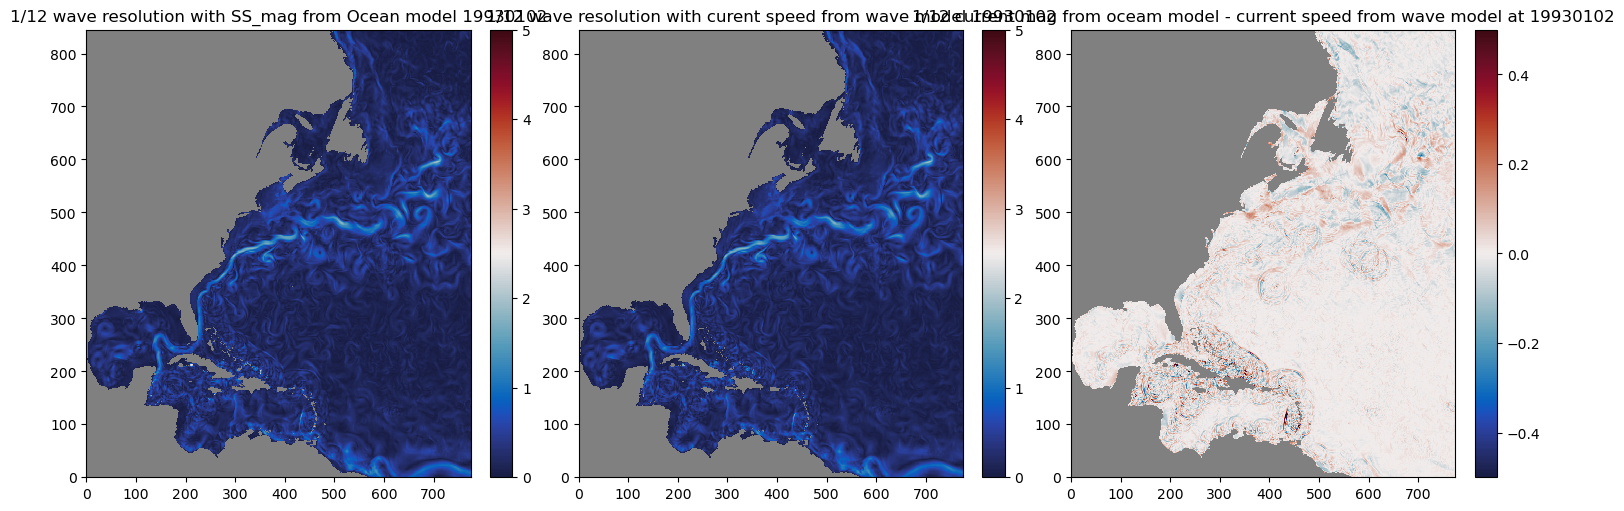

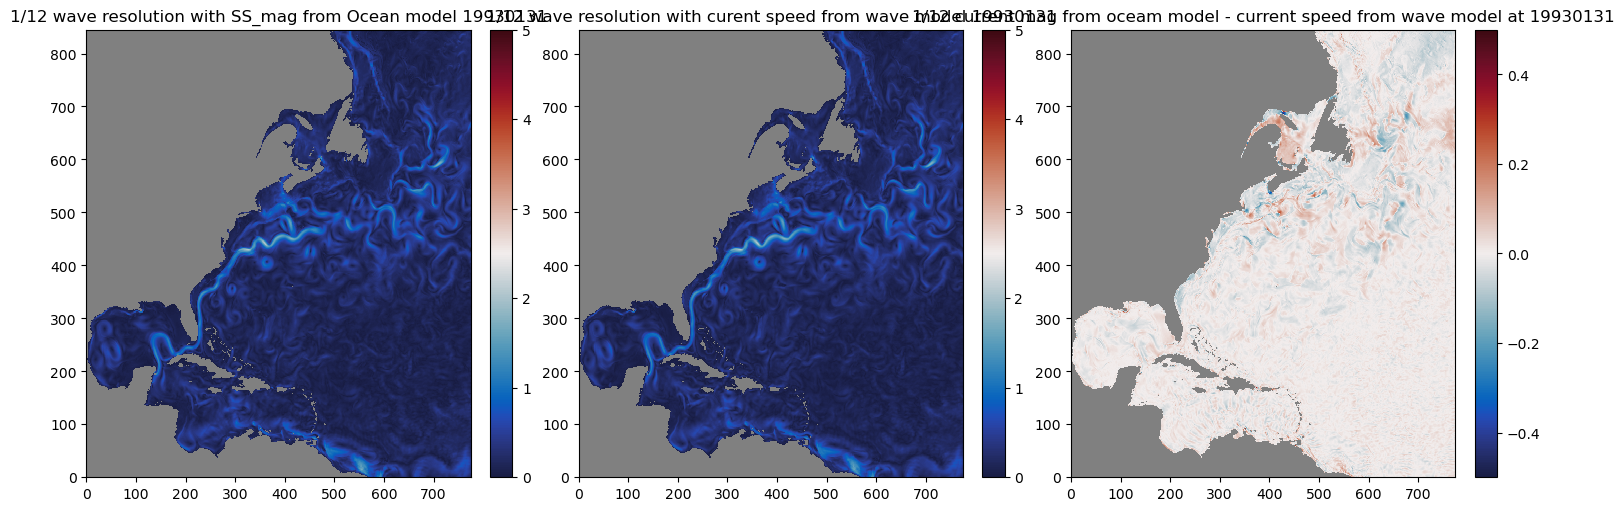

In [30]:
import cmocean
import copy
cmocean.cm.balance
cmap = copy.copy(cmocean.cm.balance)
cmap.set_bad('gray')

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


# Plot the first dataset
mesh1 = axes[0].pcolormesh(da_mag_12[0,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[0].set_title('1/12 wave resolution with SS_mag from Ocean model 19930102')
plt.colorbar(mesh1, ax=axes[0])  # Add colorbar for the first plot

# Plot the second dataset
mesh2 = axes[1].pcolormesh(da_cur_12[1,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[1].set_title('1/12 wave resolution with curent speed from wave model 19930102')
plt.colorbar(mesh2, ax=axes[1])  # Add colorbar for the second plot

# Plot the third dataset
diff_ocean_wave_1=da_mag_12[0,:,:]- da_cur_12[1,:,:]
mesh3 = axes[2].pcolormesh(diff_ocean_wave_1, cmap=cmap, shading='auto', vmin=-0.5, vmax=0.5)
axes[2].set_title('1/12 current mag from oceam model - current speed from wave model at 19930102')
plt.colorbar(mesh3, ax=axes[2])  # Add colorbar for the third plot

# Show the plot
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


# Plot the first dataset
mesh1 = axes[0].pcolormesh(da_mag_12[29,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[0].set_title('1/12 wave resolution with SS_mag from Ocean model 19930131')
plt.colorbar(mesh1, ax=axes[0])  # Add colorbar for the first plot

# Plot the second dataset
mesh2 = axes[1].pcolormesh(da_cur_12[30,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[1].set_title('1/12 wave resolution with curent speed from wave model 19930131')
plt.colorbar(mesh2, ax=axes[1])  # Add colorbar for the second plot

# Plot the third dataset
diff_ocean_wave_1=da_mag_12[29,:,:]- da_cur_12[30,:,:]
mesh3 = axes[2].pcolormesh(diff_ocean_wave_1, cmap=cmap, shading='auto', vmin=-0.5, vmax=0.5)
axes[2].set_title('1/12 current mag from oceam model - current speed from wave model at 19930131')
plt.colorbar(mesh3, ax=axes[2])  # Add colorbar for the third plot

# Show the plot
plt.show()

/ncrc/home1/Qian.Xiao/.conda/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


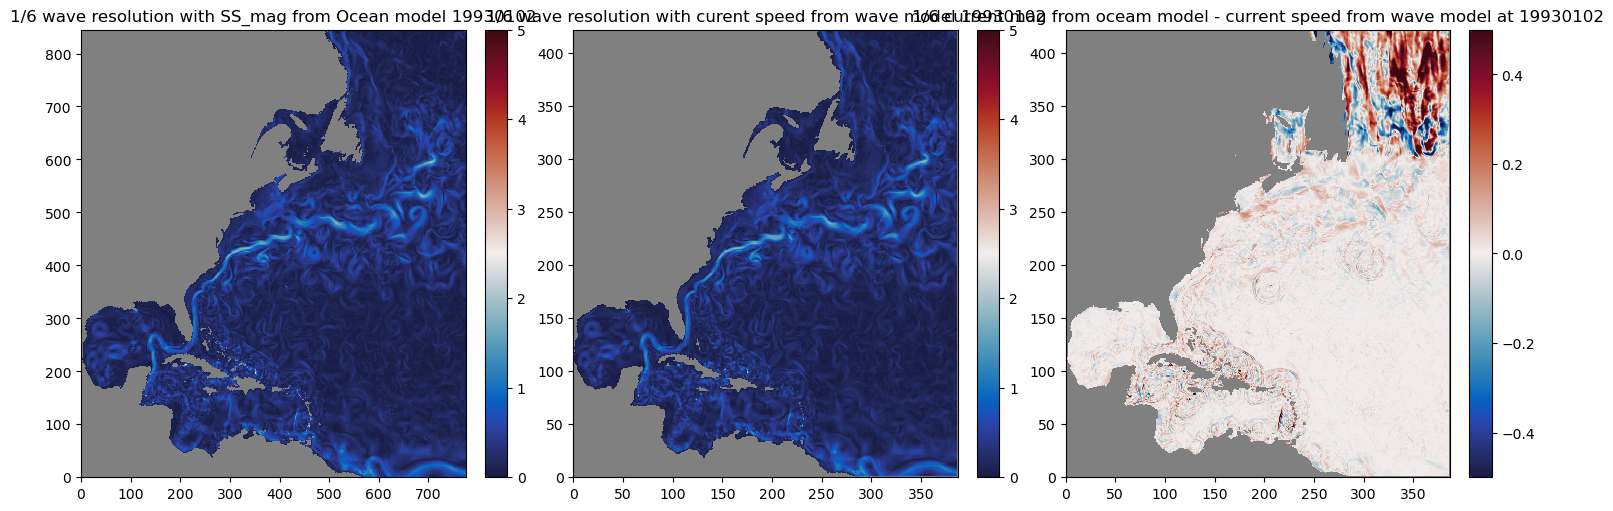

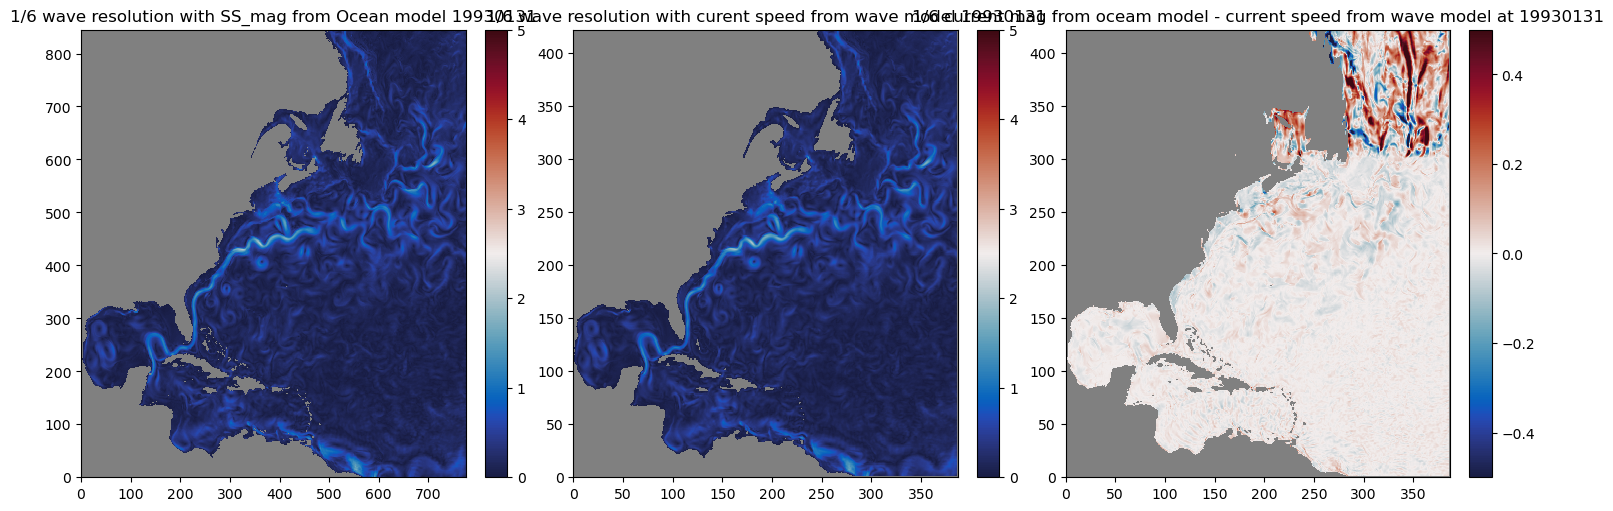

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray
import numpy as np
import logging
from netCDF4 import Dataset
import cmocean
import copy

pp_root_6="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/NWA12.COBALT_all_wave1_6/"
wave_root_6=pp_root_6+"/WW3/PostProc/ww3.199301.nc"
# wave_root_6="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/experimentF/NWA12.COBALT_wavebeta155/WW3/PostProc/ww3.199301.nc"
ocean_daily_snap_6= xarray.open_dataset(pp_root_6+"19930101.ocean_daily_snap.nc")
ocean_daily_6= xarray.open_dataset(pp_root_6+"19930101.ocean_daily.nc")
ww3_6= Dataset(wave_root_6)
ssu_6_o=ocean_daily_snap_6.variables['ssu_snap']
ssv_6_o=ocean_daily_snap_6.variables['ssv_snap']
speed_6_o=ocean_daily_snap_6.variables['speed_snap']
t_ocean = ocean_daily_snap_6.variables['time'][:] ###from the second day

ssu_6 = xarray.DataArray(ssu_6_o, dims=["time","yh", "xh"])
ssv_6 = xarray.DataArray(ssv_6_o, dims=["time","yh", "xh"])
speed_6 = xarray.DataArray(speed_6_o, dims=["time","yh", "xh"])
ssu_6=ssu_6[:,:,1:]
ssv_6=ssv_6[:,1:,:]
SS_mag_6=np.sqrt(ssu_6**2 + ssv_6**2)
model_grid_x = ocean_daily_snap_6.variables['xh']
model_grid_y = ocean_daily_snap_6.variables['yh']


ucur_6=ww3_6.variables['ucur'][:]
vcur_6=ww3_6.variables['vcur'][:]
t_6 = ww3_6.variables['time'][:] ###from the first days as this counted from 1990-01-01 days on
cur_6=np.sqrt(ucur_6**2 + vcur_6**2)    
model_grid_x_wave_6=ww3_6.variables['longitude'][0,:]
model_grid_y_wave_6=ww3_6.variables['latitude'][:,0]



da_cur_6 = xarray.DataArray(
    cur_6,
    dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
    coords={'time': t_6, 'xh': model_grid_x_wave_6, 'yh': model_grid_y_wave_6},  # Define coordinates
    name='cur'  # Optional: Give the variable a name
)   

da_mag_6 = xarray.DataArray(
    SS_mag_6,
    dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
    coords={'time': t_ocean, 'xh': model_grid_x, 'yh': model_grid_y},  # Define coordinates
    name='cur'  # Optional: Give the variable a name
)   
SS_mag_6 = da_mag_6.interp(xh=da_cur_6.xh, yh=da_cur_6.yh)


cmocean.cm.balance
cmap = copy.copy(cmocean.cm.balance)
cmap.set_bad('gray')

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


# Plot the first dataset
mesh1 = axes[0].pcolormesh(da_mag_6[0,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[0].set_title('1/6 wave resolution with SS_mag from Ocean model 19930102')
plt.colorbar(mesh1, ax=axes[0])  # Add colorbar for the first plot

# Plot the second dataset
mesh2 = axes[1].pcolormesh(da_cur_6[1,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[1].set_title('1/6 wave resolution with curent speed from wave model 19930102')
plt.colorbar(mesh2, ax=axes[1])  # Add colorbar for the second plot

# Plot the third dataset
diff_ocean_wave_1=SS_mag_6[0,:,:]- da_cur_6[1,:,:]
mesh3 = axes[2].pcolormesh(diff_ocean_wave_1, cmap=cmap, shading='auto', vmin=-0.5, vmax=0.5)
axes[2].set_title('1/6 current mag from oceam model - current speed from wave model at 19930102')
plt.colorbar(mesh3, ax=axes[2])  # Add colorbar for the third plot

# Show the plot
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


# Plot the first dataset
mesh1 = axes[0].pcolormesh(da_mag_6[29,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[0].set_title('1/6 wave resolution with SS_mag from Ocean model 19930131')
plt.colorbar(mesh1, ax=axes[0])  # Add colorbar for the first plot

# Plot the second dataset
mesh2 = axes[1].pcolormesh(da_cur_6[30,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[1].set_title('1/6 wave resolution with curent speed from wave model 19930131')
plt.colorbar(mesh2, ax=axes[1])  # Add colorbar for the second plot

# Plot the third dataset
diff_ocean_wave_1=SS_mag_6[29,:,:]- da_cur_6[30,:,:]
mesh3 = axes[2].pcolormesh(diff_ocean_wave_1, cmap=cmap, shading='auto', vmin=-0.5, vmax=0.5)
axes[2].set_title('1/6 current mag from oceam model - current speed from wave model at 19930131')
plt.colorbar(mesh3, ax=axes[2])  # Add colorbar for the third plot

# Show the plot
plt.show()

/ncrc/home1/Qian.Xiao/.conda/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


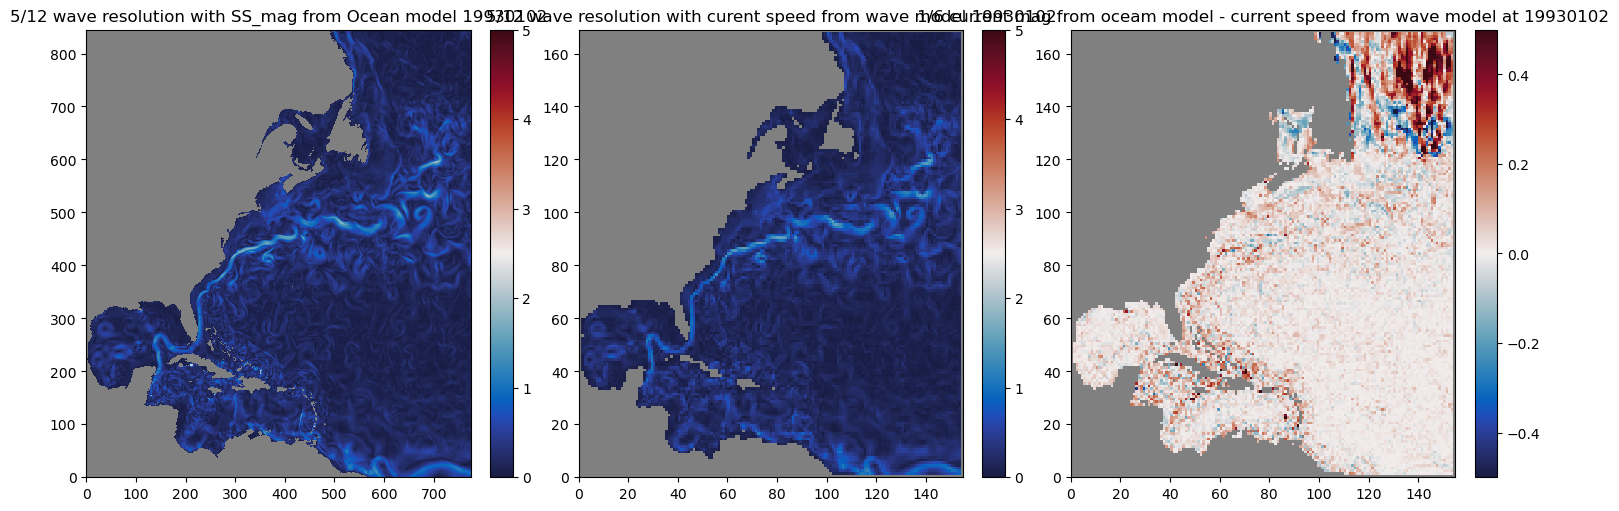

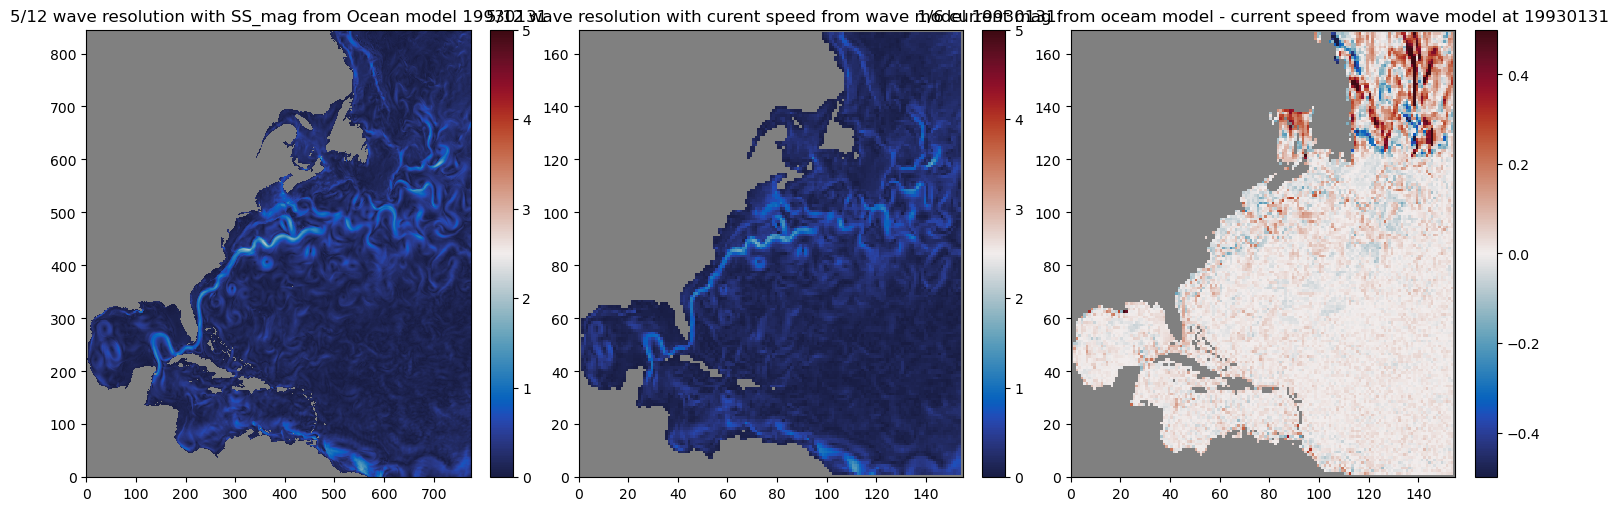

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid
import xarray
import numpy as np
import logging
from netCDF4 import Dataset
import cmocean
import copy

pp_root5_12="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/NWA12.COBALT_all_wave5_12/"
wave_root5_12=pp_root5_12+"/WW3/PostProc/ww3.199301.nc"
# wave_root5_12="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/experimentF/NWA12.COBALT_wavebeta155/WW3/PostProc/ww3.199301.nc"
ocean_daily_snap5_12= xarray.open_dataset(pp_root5_12+"19930101.ocean_daily_snap.nc")
ocean_daily5_12= xarray.open_dataset(pp_root5_12+"19930101.ocean_daily.nc")
ww35_12= Dataset(wave_root5_12)
ssu5_12_o=ocean_daily_snap5_12.variables['ssu_snap']
ssv5_12_o=ocean_daily_snap5_12.variables['ssv_snap']
speed5_12_o=ocean_daily_snap5_12.variables['speed_snap']
t_ocean = ocean_daily_snap5_12.variables['time'][:] ###from the second day

ssu5_12 = xarray.DataArray(ssu5_12_o, dims=["time","yh", "xh"])
ssv5_12 = xarray.DataArray(ssv5_12_o, dims=["time","yh", "xh"])
speed5_12 = xarray.DataArray(speed5_12_o, dims=["time","yh", "xh"])
ssu5_12=ssu5_12[:,:,1:]
ssv5_12=ssv5_12[:,1:,:]
SS_mag5_12=np.sqrt(ssu5_12**2 + ssv5_12**2)
model_grid_x = ocean_daily_snap5_12.variables['xh']
model_grid_y = ocean_daily_snap5_12.variables['yh']


ucur5_12=ww35_12.variables['ucur'][:]
vcur5_12=ww35_12.variables['vcur'][:]
t5_12 = ww35_12.variables['time'][:] ###from the first days as this counted from 1990-01-01 days on
cur5_12=np.sqrt(ucur5_12**2 + vcur5_12**2)    
model_grid_x_wave5_12=ww35_12.variables['longitude'][0,:]
model_grid_y_wave5_12=ww35_12.variables['latitude'][:,0]



da_cur5_12 = xarray.DataArray(
    cur5_12,
    dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
    coords={'time': t5_12, 'xh': model_grid_x_wave5_12, 'yh': model_grid_y_wave5_12},  # Define coordinates
    name='cur'  # Optional: Give the variable a name
)   

da_mag5_12 = xarray.DataArray(
    SS_mag5_12,
    dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
    coords={'time': t_ocean, 'xh': model_grid_x, 'yh': model_grid_y},  # Define coordinates
    name='cur'  # Optional: Give the variable a name
)   
SS_mag5_12 = da_mag5_12.interp(xh=da_cur5_12.xh, yh=da_cur5_12.yh)


cmocean.cm.balance
cmap = copy.copy(cmocean.cm.balance)
cmap.set_bad('gray')

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


# Plot the first dataset
mesh1 = axes[0].pcolormesh(da_mag5_12[0,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[0].set_title('5/12 wave resolution with SS_mag from Ocean model 19930102')
plt.colorbar(mesh1, ax=axes[0])  # Add colorbar for the first plot

# Plot the second dataset
mesh2 = axes[1].pcolormesh(da_cur5_12[1,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[1].set_title('5/12 wave resolution with curent speed from wave model 19930102')
plt.colorbar(mesh2, ax=axes[1])  # Add colorbar for the second plot

# Plot the third dataset
diff_ocean_wave_1=SS_mag5_12[0,:,:]- da_cur5_12[1,:,:]
mesh3 = axes[2].pcolormesh(diff_ocean_wave_1, cmap=cmap, shading='auto', vmin=-0.5, vmax=0.5)
axes[2].set_title('1/6 current mag from oceam model - current speed from wave model at 19930102')
plt.colorbar(mesh3, ax=axes[2])  # Add colorbar for the third plot

# Show the plot
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 5), constrained_layout=True)


# Plot the first dataset
mesh1 = axes[0].pcolormesh(da_mag5_12[29,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[0].set_title('5/12 wave resolution with SS_mag from Ocean model 19930131')
plt.colorbar(mesh1, ax=axes[0])  # Add colorbar for the first plot

# Plot the second dataset
mesh2 = axes[1].pcolormesh(da_cur5_12[30,:,:], cmap=cmap, shading='auto',vmin=0, vmax=5)
axes[1].set_title('5/12 wave resolution with curent speed from wave model 19930131')
plt.colorbar(mesh2, ax=axes[1])  # Add colorbar for the second plot

# Plot the third dataset
diff_ocean_wave_1=SS_mag5_12[29,:,:]- da_cur5_12[30,:,:]
mesh3 = axes[2].pcolormesh(diff_ocean_wave_1, cmap=cmap, shading='auto', vmin=-0.5, vmax=0.5)
axes[2].set_title('1/6 current mag from oceam model - current speed from wave model at 19930131')
plt.colorbar(mesh3, ax=axes[2])  # Add colorbar for the third plot

# Show the plot
plt.show()

Text(0.5, 1.0, '1/12 mag current on wave model 0-th day')

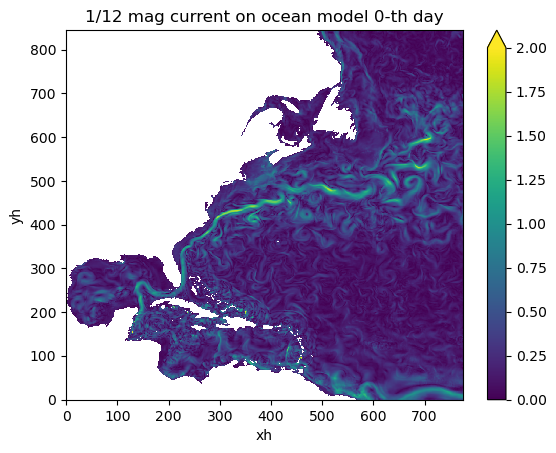

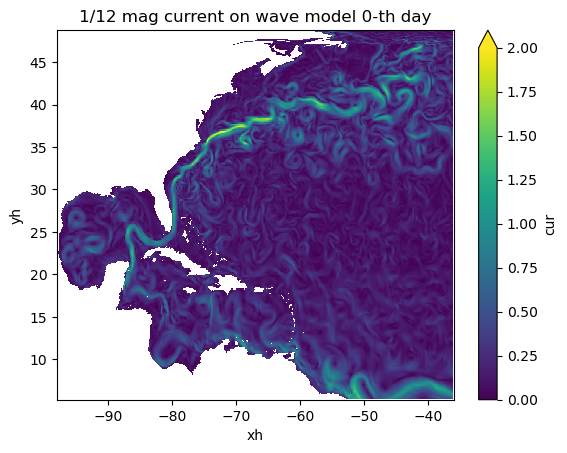

In [3]:
da_data=SS_mag_12[0,:,:]
plt.figure()
plt.pcolormesh()
plt.subplots(1,3)
fix
plt.title('1/12 mag current on ocean model 0-th day')
CMocean pacakge,: colormap,
da_data=da_cur_12[0,:,:]
plt.figure()
da_data.plot(vmin=0,vmax=2)
plt.title('1/12 mag current on wave model 0-th day')

time, grid,

In [24]:
ww3_12

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    WAVEWATCH_III_version_number: 6.07
    WAVEWATCH_III_switches: F90 NCO NOGRB DIST MPI PR3 UQ ST4 STAB0 FLX0 LN1 NL1 IC0 IS0 REF0 BT1 DB1 MLIM TR0 BS0 XX0 WNX1 WNT1 CRX1 CRT1 O0 O1 O2 O4 O5 O6 O7
    SIN4 namelist parameter BETAMAX: 1.55
    product_name: ww3.199301.nc
    area: Regional Grid
    latitude_resolution: n/a
    longitude_resolution: n/a
    southernmost_latitude: 5.
    northernmost_latitude: 58.
    westernmost_longitude: -98.
    easternmost_longitude: -36.
    minimum_altitude: -12000 m
    maximum_altitude: 9000 m
    altitude_resolution: n/a
    start_date: 1993-01-01 00:00:00
    stop_date: 1993-01-31 23:00:00
    dimensions(sizes): level(1), longitude(775), latitude(845), time(744)
    variables(dimensions): float32 longitude(latitude, longitude), float32 latitude(latitude, longitude), float64 time(time), int16 MAPSTA(latitude, longitude), float32 ucur(time, latitude

In [15]:
import matplotlib.pyplot as plt
import xarray
import numpy as np
from netCDF4 import Dataset

pp_root_OM4="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/OM4_025_tryow.JRA/"
wave_root_OM4=pp_root_OM4+"/WW3/PostProc/ww3.1958.nc"
# wave_root_12="/gpfs/f5/gfdl_o/scratch/Qian.Xiao/FMS_Wave_Coupling/examples/experimentF/NWA12.COBALT_wavebeta155/WW3/PostProc/ww3.199301.nc"
ocean_daily_snap_OM4= xarray.open_dataset(pp_root_OM4+"19580101.ocean_daily_snap.nc")
ww3_OM4= Dataset(wave_root_OM4)
ssu_OM4_o=ocean_daily_snap_OM4.variables['ssu_snap']
ssv_OM4_o=ocean_daily_snap_OM4.variables['ssv_snap']

ssu_OM4 = xarray.DataArray(ssu_OM4_o, dims=["time","yh", "xh"])
ssv_OM4 = xarray.DataArray(ssv_OM4_o, dims=["time","yh", "xh"])
ssu_OM4=ssu_OM4[:,:,1:]
ssv_OM4=ssv_OM4[:,1:,:]
SS_mag_OM4=np.sqrt(ssu_OM4**2 + ssv_OM4**2)
model_grid_x = ocean_daily_snap_OM4.variables['xh']
model_grid_y = ocean_daily_snap_OM4.variables['yh']

ucur_OM4=ww3_OM4.variables['ucur'][:]
vcur_OM4=ww3_OM4.variables['vcur'][:]
t_OM4 = ww3_OM4.variables['time'][:]
cur_OM4=np.sqrt(ucur_OM4**2 + vcur_OM4**2)    
model_grid_x_wave_OM4=ww3_OM4.variables['longitude'][0,:]
model_grid_y_wave_OM4=ww3_OM4.variables['latitude'][:,0]
da_cur_OM4 = xarray.DataArray(
    cur_OM4,
    dims=['time', 'yh', 'xh'],  # Adjust based on your variable's shape
    coords={'time': t_OM4, 'xh': model_grid_x, 'yh': model_grid_y},  # Define coordinates
    name='cur'  # Optional: Give the variable a name
)   

# diff_ocean=speed_OM4-SS_mag_OM4
# dass_mag_OM4=xarray.DataArray(diff_ocean[89,:,:], dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
# plt.figure()
# dass_mag_OM4.plot(vmin=-0.1,vmax=0.1)
# plt.title('1/12 speed - mag current speed 89 th day')

# diff_ocean=speed_OM4-SS_mag_OM4
# dass_mag_OM4=xarray.DataArray(diff_ocean[1,:,:], dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
# plt.figure()
# dass_mag_OM4.plot(vmin=-0.1,vmax=0.1)
# plt.title('1/12 speed - mag current speed first day')



/ncrc/home1/Qian.Xiao/.conda/envs/mom6py/lib/python3.12/site-packages/numpy/ma/core.py:6980: RuntimeWarning: overflow encountered in power
  result = np.where(m, fa, umath.power(fa, fb)).view(basetype)


Text(0.5, 1.0, 'OM4.JRA mag current - wave current 5-th day')

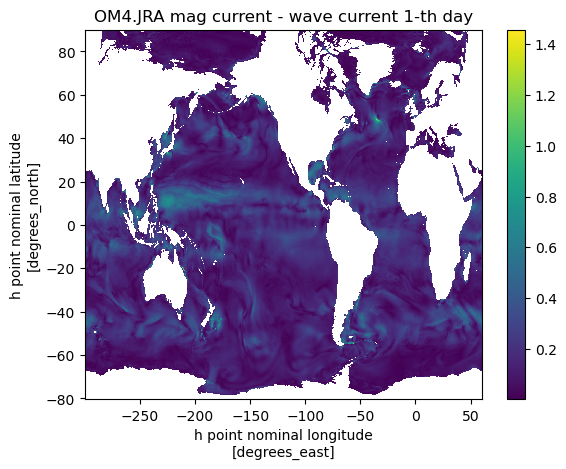

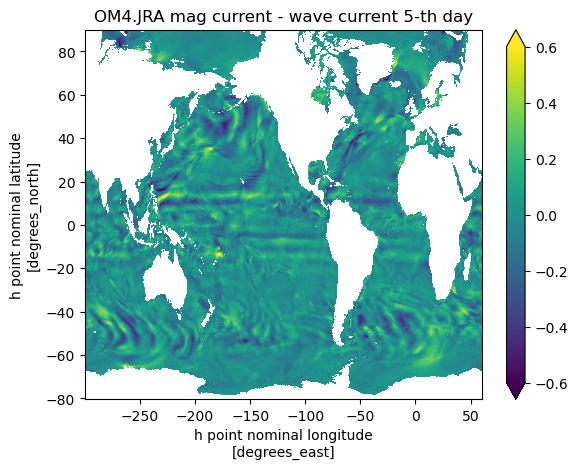

In [17]:
# SS_mag_OM4=SS_mag_OM4.sortby("coordinate_name")
diff_ocean_wave_1=SS_mag_OM4[0,:,:]- da_cur_OM4[0,:,:]
# daocean_wave_OM4=xarray.DataArray(diff_ocean_wave_1, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
# da_diff_ocean_wave_1=diff_ocean_wave_1.sortby(['yh','xh'])
plt.figure()
diff_ocean_wave_1.plot()
plt.title('OM4.JRA mag current - wave current 1-th day')


diff_ocean_wave_1=SS_mag_OM4[4,:,:]- da_cur_OM4[4,:,:]
# daocean_wave_OM4=xarray.DataArray(diff_ocean_wave_1, dims=['yh', 'xh'], coords={'xh': model_grid_x, 'yh': model_grid_y})
plt.figure()
diff_ocean_wave_1.plot(vmin=-0.6,vmax=0.6)
plt.title('OM4.JRA mag current - wave current 5-th day')

In [12]:
model_grid_x

<xarray.IndexVariable 'xh' (xh: 1440)>
array([-299.724244, -299.476198, -299.22815 , ...,   59.531631,   59.77967 ,
         60.027712])
Attributes:
    units:      degrees_east
    long_name:  h point nominal longitude
    axis:       X

In [13]:
 model_grid_y

<xarray.IndexVariable 'yh' (yh: 1080)>
array([-80.389238, -80.308075, -80.226911, ...,  89.729781,  89.837868,
        89.945956])
Attributes:
    units:      degrees_north
    long_name:  h point nominal latitude
    axis:       Y

In [14]:
model_grid_x_wave_OM4

masked_array(data=[--, --, --, ..., 59.53776550292969, 59.785728454589844,
                   60.03369140625],
             mask=[ True,  True,  True, ..., False, False, False],
       fill_value=9.96921e+36,
            dtype=float32)